# Gold Coast wave monitoring 

Measured and derived wave parameters from data collected by a wave monitoring buoy anchored at the Gold Coast.
For more information please refer to www.qld.gov.au/waves.

The dataset is available from the [Gold Coast wave monitoring](https://www.qld.gov.au/environment/coasts-waterways/beach/monitoring/waves-sites/gold-coast) website. On this page you will find at the bottom right a `Download data` button, which provides a link to a series of dataset.



#### Field names:

+ `Hs` - Significant wave height, an average of the highest third of the waves in a record (26.6 minute recording period).
+ `Hmax` - The maximum wave height in the record.
+ `Tz` - The zero upcrossing wave period.
+ `Tp` - The peak energy wave period.
+ `Peak Direction` - Direction (related to true north) from which the peak period waves are coming from.
+ `SST` - Approximation of sea surface temperature.

In [1]:
%matplotlib inline
import io
import requests
from pylab import *
import netCDF4
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'

## Getting the dataset 

From the website you can either download a `CSV` containing the data or directly get it from the provided `url`.

In [2]:
# Get the URL link
# url = "https://www.data.qld.gov.au/dataset/d656d418-31b1-41fe-aae2-3d8a12588711/resource/73b4e42a-f3e7-4632-8b8e-d52205899048/download/gold-coast_2020-01-01t00_00-2020-12-31t23_30.csv"
url = "https://www.data.qld.gov.au/dataset/d656d418-31b1-41fe-aae2-3d8a12588711/resource/edc414a8-3ffa-47a2-9d9b-14f07eb22072/download/gold-coast_2021-01-01t00_00-2021-09-30t23_30_waveverifieddata.csv"
# Open it with Pandas Library
s = requests.get(url).content
data_df = pd.read_csv(io.StringIO(s.decode('utf-8')))

We can visualise what is in the dataset by doing:

In [3]:
data_df

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,2021-01-01T00:00,1.252,1.93,5.265,7.839,103.24,24.05
1,2021-01-01T00:30,1.186,1.80,4.652,7.550,99.24,24.05
2,2021-01-01T01:00,1.226,1.98,4.665,7.043,91.24,24.05
3,2021-01-01T01:30,1.303,2.35,4.757,7.473,94.24,24.05
4,2021-01-01T02:00,1.385,2.61,5.040,7.567,86.24,24.05
...,...,...,...,...,...,...,...
17515,2021-12-31T21:30,2.101,3.87,5.489,8.510,-99.90,-99.90
17516,2021-12-31T22:00,1.898,3.41,5.243,7.637,-99.90,-99.90
17517,2021-12-31T22:30,2.119,3.72,5.570,7.802,-99.90,-99.90
17518,2021-12-31T23:00,2.029,3.65,5.734,7.535,-99.90,-99.90


First let's define the `Date/Time` format:

In [4]:
dates = pd.to_datetime(data_df['Date/Time'], format = '%Y-%m-%d %H:%M:%S')

## Plotting it

We can now plot the data, for example we will plot the significant wave height `Hs` over time:

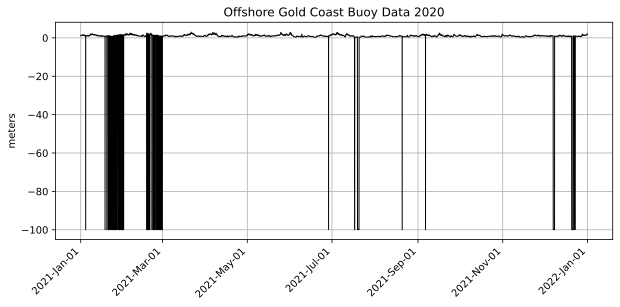

In [5]:
# Figure dimension
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(111)

# Hs over time is specified here
ax.plot(dates,data_df['Hs'], c='k', linewidth=1) 

# Decorators for the plot
locator = mdates.AutoDateLocator()
ax.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# Axis labels 
plt.title('Offshore Gold Coast Buoy Data 2020')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b-%d'))
ax.set_ylabel('meters')

fig.show()

It seems that there are some weird data on this graph... obviously we don't expect to get negative values for `Hs`...

## Dealing with nodata

Let's find out these values:

In [6]:
data_df['Hs'].min()

-99.9

Ok, so we have no data values that are specified as -99.9. 

Instead of giving them a default values we will define them as `NaN` directly.

In [7]:
# We could use that data_df = data_df.replace(-99.9,np.NaN) or the following
data_df['Hs'] = data_df['Hs'].replace(data_df['Hs'].min(),np.NaN)

Let's plot the dataset now...

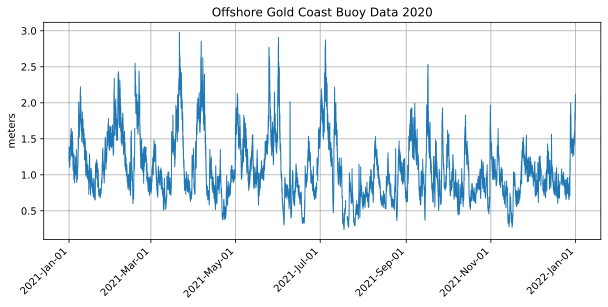

In [8]:
# Figure dimension
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(111)

# Hs over time is specified here
ax.plot(dates,data_df['Hs'], linewidth=1) 

# Decorators for the plot
locator = mdates.AutoDateLocator()
ax.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# Axis labels 
plt.title('Offshore Gold Coast Buoy Data 2020')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b-%d'))
ax.set_ylabel('meters')

fig.show()

Look's better now! You can try to plot one of the other parameters:

+ `Hmax` - The maximum wave height in the record.
+ `Tz` - The zero upcrossing wave period.
+ `Tp` - The peak energy wave period.
+ `SST` - Approximation of sea surface temperature.